## **Nara Miranda Guimarães**
##**RG: 44.662.603-x**

In [191]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import random
from numpy import sqrt 
from math import sqrt

In [136]:
fashion_df = pd.read_csv("fashion-mnist_train.csv", sep=",")
fashion_df.shape

(60000, 785)

In [137]:
fashionPartial_df = fashion_df.sample(frac=0.1)
fashionPartial_df.shape

(6000, 785)

In [138]:
fashionPartial_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,4.480000,0.000333,0.003333,0.027667,0.085167,0.239500,0.448833,0.902333,2.338333,5.985833,14.906333,33.025167,46.182500,52.240333,50.837167,50.397167,54.080500,52.142667,41.123667,26.790667,10.862167,4.410833,2.391833,1.445333,1.099333,0.585500,0.363833,0.108167,0.041167,0.005000,0.012500,0.067667,0.387833,0.801333,2.191000,7.312500,17.529000,33.183167,54.305667,80.143000,...,93.302500,91.360333,79.715833,62.916833,45.682500,44.375333,48.940167,40.568667,23.824167,10.164000,4.102667,0.634000,0.019000,0.169667,1.099000,4.856833,13.284167,21.520167,21.486000,17.633833,22.931667,31.421500,42.189500,51.903167,52.992833,47.025000,43.581333,45.964167,50.860333,46.711667,34.822333,23.460000,16.456167,17.835500,23.130833,18.691833,9.215667,3.128833,0.941000,0.034667
std,2.868793,0.025820,0.183470,0.526891,2.058791,4.040486,6.262395,8.657672,14.424512,24.882842,38.874324,57.683959,66.557458,68.550269,67.745661,66.791496,69.531821,68.555894,63.067990,52.757705,33.255157,21.399230,16.151041,11.967423,10.765320,8.089289,6.583491,3.414978,2.495632,0.252294,0.374211,2.051858,6.872187,9.973403,16.460448,30.080165,47.312594,66.739326,83.065901,95.578649,...,101.258693,99.862849,95.437556,89.012000,78.114094,77.603044,84.677370,75.929580,57.950153,39.962206,25.732097,8.647823,0.853479,3.453675,9.858198,21.944413,38.764613,50.050176,48.717687,42.901109,49.197043,56.292285,62.760779,68.575381,70.072466,67.903548,67.123039,67.395254,69.529374,66.355927,58.062397,49.226134,41.822162,43.905293,52.585790,46.175071,31.005076,19.065356,9.136489,0.903844
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [139]:
fashionPartial_df.dtypes

label       int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
            ...  
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
pixel784    int64
Length: 785, dtype: object

In [140]:
fashionPartial_df.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
30497,0,0,0,0,0,0,0,0,0,0,42,22,0,0,0,0,0,0,0,41,53,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,122,180,185,210,...,182,184,207,204,177,173,0,0,1,0,0,0,0,0,0,0,0,0,0,114,187,173,162,142,154,170,134,142,154,153,161,161,160,160,0,0,1,0,0,0
40622,4,0,0,0,0,1,0,0,0,0,99,240,214,216,165,152,207,237,196,0,0,0,3,1,0,1,0,0,0,0,0,0,0,0,0,0,27,134,223,137,...,240,243,234,230,252,184,55,255,231,219,48,0,0,32,131,195,135,0,243,219,212,201,214,210,224,155,174,210,202,174,176,172,186,77,0,165,82,17,0,0
14025,2,0,0,0,0,0,0,0,0,0,0,19,87,71,82,86,87,86,99,110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,167,...,0,0,0,0,0,0,6,97,87,27,0,0,0,0,0,1,47,35,0,0,1,0,0,0,0,0,1,1,1,1,0,1,0,0,0,30,40,0,0,0


In [141]:
Y = fashionPartial_df['label']
X = fashionPartial_df.drop(columns='label', inplace=False)

In [142]:
Y

30497    0
40622    4
14025    2
49093    4
4315     2
        ..
25825    1
38617    9
50944    3
36129    0
31184    9
Name: label, Length: 6000, dtype: int64

In [143]:
Y.unique()

array([0, 4, 2, 3, 1, 8, 5, 9, 7, 6])

De acordo com a documentação: (https://github.com/zalandoresearch/fashion-mnist)

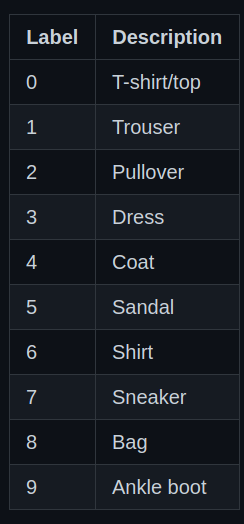

In [144]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
30497,0,0,0,0,0,0,0,0,0,42,22,0,0,0,0,0,0,0,41,53,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,122,180,185,210,100,...,182,184,207,204,177,173,0,0,1,0,0,0,0,0,0,0,0,0,0,114,187,173,162,142,154,170,134,142,154,153,161,161,160,160,0,0,1,0,0,0
40622,0,0,0,0,1,0,0,0,0,99,240,214,216,165,152,207,237,196,0,0,0,3,1,0,1,0,0,0,0,0,0,0,0,0,0,27,134,223,137,171,...,240,243,234,230,252,184,55,255,231,219,48,0,0,32,131,195,135,0,243,219,212,201,214,210,224,155,174,210,202,174,176,172,186,77,0,165,82,17,0,0
14025,0,0,0,0,0,0,0,0,0,0,19,87,71,82,86,87,86,99,110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,167,177,...,0,0,0,0,0,0,6,97,87,27,0,0,0,0,0,1,47,35,0,0,1,0,0,0,0,0,1,1,1,1,0,1,0,0,0,30,40,0,0,0
49093,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,173,...,0,0,3,0,42,178,159,186,0,0,0,0,0,0,0,0,102,162,152,34,0,2,0,0,0,0,0,0,0,0,2,0,14,162,169,147,0,0,0,0
4315,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,26,70,171,223,...,90,57,54,86,13,30,202,154,18,0,0,0,0,0,0,0,12,75,105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,121,95,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25825,0,0,0,0,0,0,0,0,0,0,33,168,131,141,114,145,154,156,199,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,255,...,240,235,218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,109,152,61,0,0,142,192,167,0,0,0,0,0,0,0,0,0
38617,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50944,0,0,0,0,0,0,0,0,0,7,16,12,5,0,10,119,54,8,12,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,18,13,14,...,192,180,202,53,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,86,104,120,118,122,126,133,125,110,0,0,0,0,0,0,0,0,0
36129,0,0,0,0,0,0,0,1,3,0,29,143,121,96,103,99,127,144,26,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,0,168,172,...,254,251,251,231,250,211,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,116,127,151,162,161,154,147,166,151,114,90,29,0,0,0,0,0,0,0


In [145]:
X_array = X.to_numpy()
X_array

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ..., 17,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [146]:
#fazendo o reshape para gerar a visualização

X_array_3d = np.reshape(X_array, (6000, 28, 28)) 
X_array_3d

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   1,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0, 151, 230, ..., 215,   6,   0],
        [  0, 180, 255, ..., 219,  48,   0],
        [  0,  32, 131, ...,  17,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,  51,   0,   0],
        [  0,   0,   0, ...,  27,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0

In [147]:
X_array_3d.shape

(6000, 28, 28)

In [148]:
Y_array = Y.to_numpy()
Y_array

array([0, 4, 2, ..., 3, 0, 9])

In [149]:
Y_array.shape

(6000,)

**Visualizando 9 itens selecionados aleatóriamente**

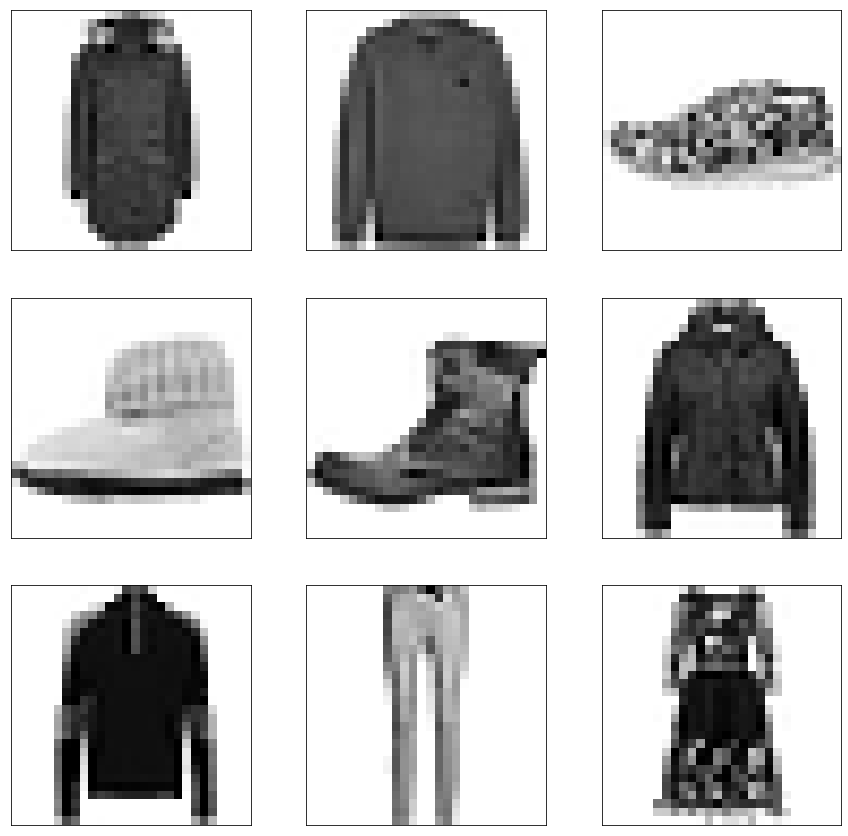

In [150]:
LINHAS  = 3
COLUNAS = 3

fig, ax = plt.subplots(nrows=LINHAS, ncols=COLUNAS, figsize=(15,15))

for linha in range(LINHAS):
  for coluna in range(COLUNAS):
    index = random.randint(0, len(fashionPartial_df))

    ax[linha, coluna].matshow(X_array_3d[index], cmap='gray_r')
    ax[linha, coluna].set_xticks([])
    ax[linha, coluna].set_yticks([])

**Preparando os dados**

In [152]:
#normalizando os dados

std_scaler = StandardScaler()
X_array_new = std_scaler.fit_transform(X_array)
print(f'X: {X_array_new}')
print(f'Y: {Y_array}')

X: [[-0.01291102 -0.01816981 -0.05251365 ... -0.16412461 -0.1030022
  -0.03835789]
 [-0.01291102 -0.01816981 -0.05251365 ...  0.72761937 -0.1030022
  -0.03835789]
 [-0.01291102 -0.01816981 -0.05251365 ... -0.16412461 -0.1030022
  -0.03835789]
 ...
 [-0.01291102 -0.01816981 -0.05251365 ... -0.16412461 -0.1030022
  -0.03835789]
 [-0.01291102 -0.01816981 -0.05251365 ... -0.16412461 -0.1030022
  -0.03835789]
 [-0.01291102 -0.01816981 -0.05251365 ... -0.16412461 -0.1030022
  -0.03835789]]
Y: [0 4 2 ... 3 0 9]


**Visualizando os dados com PCA para 2 componentes**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


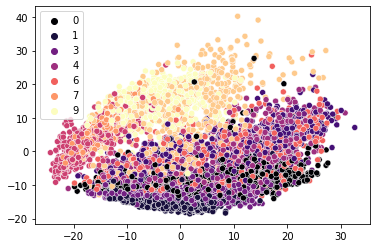

In [153]:
pca       = PCA(n_components=2)
dados_pca = pca.fit_transform(X_array_new)

sns.scatterplot(dados_pca[:, 0], dados_pca[:, 1], hue=Y_array, palette='magma');

**Visualização aplicando o método TSNE - um algoritmo de visualização de dados de altas dimensões**

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


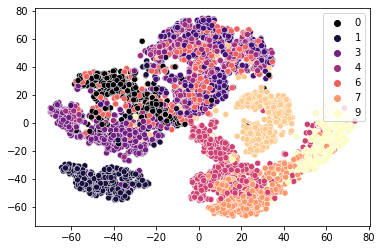

In [154]:
tsne       =  TSNE()
dados_tsne = tsne.fit_transform(X_array_new)

sns.scatterplot(dados_tsne[:, 0], dados_tsne[:, 1], hue=Y_array, palette='magma');

**Aplicando modelos de Agrupamentos**

**KMeans**

In [155]:
kmeans = KMeans(n_clusters=10)
kmeans = kmeans.fit(dados_tsne)

**Agglomerative Clustering**

In [173]:
agglomerative = AgglomerativeClustering(n_clusters=10)
agglomerative = agglomerative.fit(dados_tsne)

**Labels definidos pelos Agrupamentos**

In [174]:
print(f'Kmeans: {kmeans.labels_}')
print(f'Aglomerative: {agglomerative.labels_}')

Kmeans: [1 3 5 ... 4 4 2]
Aglomerative: [7 0 6 ... 2 2 1]


**Comparando os agrupamentos com as classes dadas pelo dataset**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


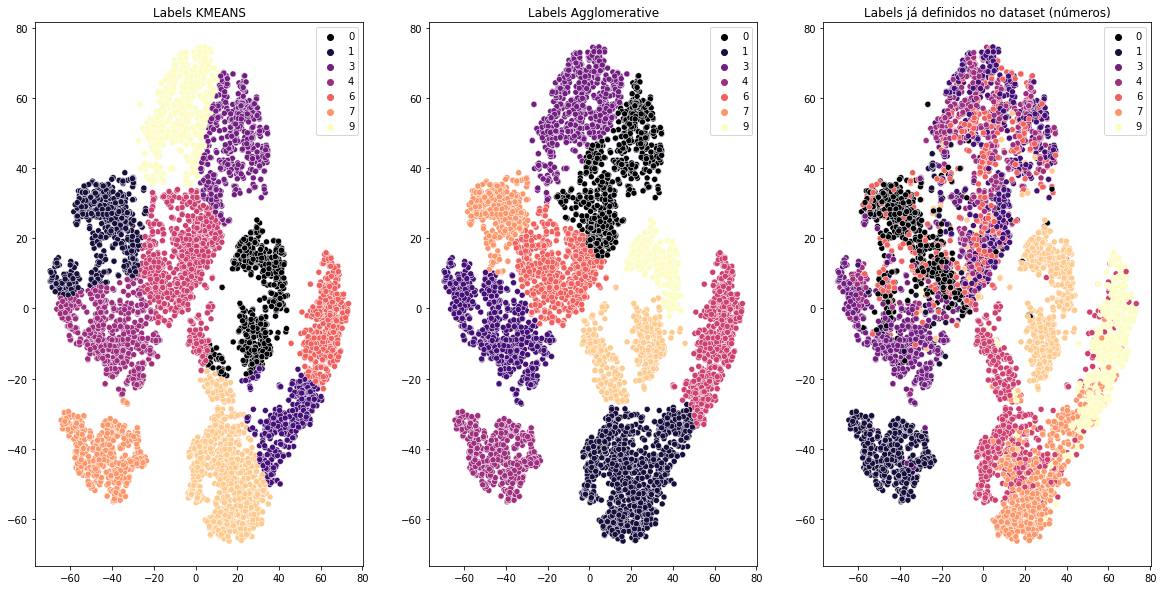

In [175]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,10))


sns.scatterplot(dados_tsne[:, 0], dados_tsne[:, 1], hue=kmeans.labels_,        ax=ax[0], palette='magma')
sns.scatterplot(dados_tsne[:, 0], dados_tsne[:, 1], hue=agglomerative.labels_, ax=ax[1], palette='magma')
sns.scatterplot(dados_tsne[:, 0], dados_tsne[:, 1], hue=Y_array,               ax=ax[2], palette='magma')

ax[0].set_title('Labels KMEANS')
ax[1].set_title('Labels Agglomerative');
ax[2].set_title('Labels já definidos no dataset (números)');

**Avaliando os Agrupamentos**

**Silhouette score**

In [176]:
kmeans_score        = silhouette_score(dados_tsne, kmeans.labels_)
agglomerative_score = silhouette_score(dados_tsne, agglomerative.labels_)

kmeans_score_rounded = round(kmeans_score,3)
agglomerative_score_rounded = round(agglomerative_score, 3)

In [177]:
print('K-means      : ',kmeans_score_rounded)
print('Agglomerative: ',agglomerative_score_rounded)

K-means      :  0.422
Agglomerative:  0.412


Os clusteres não estão tão asfastados um dos outros, porém estão mais afastados no modelos de K-means do que no modelo de Agglomerative Clustering

**Testando os Agrupamentos**

In [178]:
NUM_TESTES    = 10
valores_teste = []

for _ in range(NUM_TESTES):
  
  valores_teste.append(random.choice(dados_tsne))

valores_teste = np.array(valores_teste)
kmeans.predict(valores_teste) 

array([5, 1, 7, 5, 5, 5, 5, 2, 7, 4], dtype=int32)

**Aplicando o método do cotovelo**

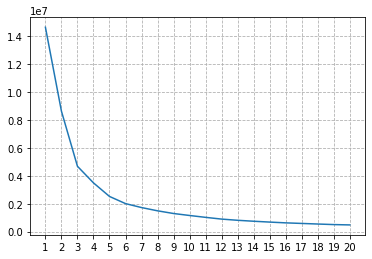

In [179]:
scores = []

for k in (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20):
    kmeans = KMeans(n_clusters=k, random_state=0,).fit(dados_tsne)
    scores.append(kmeans.inertia_)
    
plt.plot(range(len(scores)), scores)
plt.xticks(range(len(scores)), ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20'])
plt.grid(True, linestyle='--')
plt.show();

**Número ótimo de clusters**
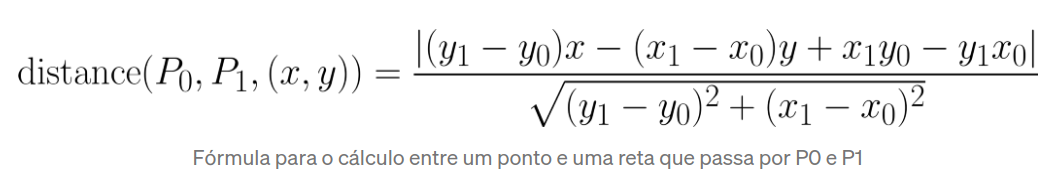

In [192]:
def calculate_wcss(data):
    wcss = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss

In [193]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+1
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 1

In [194]:
# calculando a soma dos quadrados para os 20 clusters
sum_of_squares = calculate_wcss(X)

# calculando a quantidade ótima de clusters
n = optimal_number_of_clusters(sum_of_squares)

print(f'Número ótimo de clusters {n}')

# rodando o kmeans para nossa quantidade ótima de clusters
kmeans = KMeans(n_clusters=n)
clusters = kmeans.fit_predict(X)

Número ótimo de clusters 6


Usando a fórmula da distância entre um ponto e uma reta, observa-se que para o dataset estudado a quantidade de clusters ótima é de 6 clusters. Corroborando o que foi plotado no gráfico pelo método do cotovelo.